In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
plt.style.use('dark_background')

In [87]:
dataset = pd.read_csv('77_cancer_proteomes_CPTAC_itraq.csv')
dataset

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,NP_001191293,NaN,protein FAM24B precursor,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
12549,NP_775791,NaN,putative uncharacterized protein C9orf62,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
12550,NP_004065,COX8A,"cytochrome c oxidase subunit 8A, mitochondrial",NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12551,NP_068752,MIIP,migration and invasion-inhibitory protein,-0.633517,4.840325,-1.965192,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019861,-1.718327,-0.369183


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [89]:
dataset.nunique().head(60)

RefSeq_accession_number    12553
gene_symbol                10062
gene_name                  12472
AO-A12D.01TCGA              2091
C8-A131.01TCGA              1854
AO-A12B.01TCGA              2567
BH-A18Q.02TCGA              2710
C8-A130.02TCGA              1925
C8-A138.03TCGA              2123
E2-A154.03TCGA              2529
C8-A12L.04TCGA              2439
A2-A0EX.04TCGA              2062
AO-A12D.05TCGA              2174
AN-A04A.05TCGA              2116
BH-A0AV.05TCGA              2494
C8-A12T.06TCGA              2153
A8-A06Z.07TCGA              2642
A2-A0CM.07TCGA              2013
BH-A18U.08TCGA              2244
A2-A0EQ.08TCGA              2163
AR-A0U4.09TCGA              2478
AO-A0J9.10TCGA              1882
AR-A1AP.11TCGA              1834
AN-A0FK.11TCGA              2024
AO-A0J6.11TCGA              2589
A7-A13F.12TCGA              1924
BH-A0E1.12TCGA              2026
A7-A0CE.13TCGA              2138
A2-A0YC.13TCGA              1922
AO-A0JC.14TCGA              2160
A8-A08Z.14

In [90]:
dataset.nunique().tail(26)

AN-A0AL.28TCGA    2426
A2-A0T6.29TCGA    2347
E2-A158.29TCGA    2607
E2-A15A.29TCGA    1691
AO-A0JM.30TCGA    2352
C8-A12V.30TCGA    2197
A2-A0D2.31TCGA    2368
C8-A12U.31TCGA    2029
AR-A1AS.31TCGA    2183
A8-A09G.32TCGA    3076
C8-A131.32TCGA    2055
C8-A134.32TCGA    2156
A2-A0YF.33TCGA    1841
BH-A0DD.33TCGA    2888
BH-A0E9.33TCGA    2308
AR-A0TT.34TCGA    2073
AO-A12B.34TCGA    2928
A2-A0SW.35TCGA    2113
AO-A0JL.35TCGA    2214
BH-A0BV.35TCGA    2087
A2-A0YM.36TCGA    2763
BH-A0C7.36TCGA    2528
A2-A0SX.36TCGA    2373
263d3f-I.CPTAC    2897
blcdb9-I.CPTAC    4199
c4155b-C.CPTAC    3219
dtype: int64

In [91]:
dataset.isna().sum().head(60)

RefSeq_accession_number       0
gene_symbol                1780
gene_name                     0
AO-A12D.01TCGA             1219
C8-A131.01TCGA             1218
AO-A12B.01TCGA             1219
BH-A18Q.02TCGA              529
C8-A130.02TCGA              528
C8-A138.03TCGA              720
E2-A154.03TCGA              720
C8-A12L.04TCGA              821
A2-A0EX.04TCGA              821
AO-A12D.05TCGA             1277
AN-A04A.05TCGA             1277
BH-A0AV.05TCGA             1279
C8-A12T.06TCGA             1421
A8-A06Z.07TCGA             1682
A2-A0CM.07TCGA             1682
BH-A18U.08TCGA             1573
A2-A0EQ.08TCGA             1573
AR-A0U4.09TCGA             1805
AO-A0J9.10TCGA             1401
AR-A1AP.11TCGA              974
AN-A0FK.11TCGA              974
AO-A0J6.11TCGA              975
A7-A13F.12TCGA             1445
BH-A0E1.12TCGA             1445
A7-A0CE.13TCGA             1408
A2-A0YC.13TCGA             1408
AO-A0JC.14TCGA             1634
A8-A08Z.14TCGA             1634
AR-A0TX.

In [92]:
dataset.isna().sum().tail(26)

AN-A0AL.28TCGA    1687
A2-A0T6.29TCGA    1273
E2-A158.29TCGA    1272
E2-A15A.29TCGA    1272
AO-A0JM.30TCGA     935
C8-A12V.30TCGA     934
A2-A0D2.31TCGA     847
C8-A12U.31TCGA     847
AR-A1AS.31TCGA     847
A8-A09G.32TCGA    1156
C8-A131.32TCGA    1156
C8-A134.32TCGA    1156
A2-A0YF.33TCGA    1329
BH-A0DD.33TCGA    1329
BH-A0E9.33TCGA    1329
AR-A0TT.34TCGA    1076
AO-A12B.34TCGA    1076
A2-A0SW.35TCGA    2229
AO-A0JL.35TCGA    2229
BH-A0BV.35TCGA    2229
A2-A0YM.36TCGA    2859
BH-A0C7.36TCGA    2860
A2-A0SX.36TCGA    2856
263d3f-I.CPTAC    1641
blcdb9-I.CPTAC    1668
c4155b-C.CPTAC    1640
dtype: int64

In [93]:
dataset.drop(['RefSeq_accession_number','gene_symbol','gene_name'],axis = 1,inplace=True)
dataset

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,-5.196859,-6.101005,-2.578828,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
12549,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
12550,NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,-1.726336,1.294925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12551,-0.633517,4.840325,-1.965192,NaN,NaN,NaN,NaN,NaN,NaN,-0.189341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019861,-1.718327,-0.369183


In [94]:
data = dataset.values

In [95]:
SI = SimpleImputer (missing_values = np.NaN ,strategy = 'mean')
SI = SI.fit(data[:,:])
data[:,:] = SI.transform(data[:,:])

In [96]:
#SC = StandardScaler ()
#data[:,:] = SC.fit_transform(data[:,:])

In [97]:
df_data = pd.DataFrame(data , columns=['AO-A12D.01TCGA','C8-A131.01TCGA','AO-A12B.01TCGA','BH-A18Q.02TCGA','C8-A130.02TCGA','C8-A138.03TCGA','E2-A154.03TCGA','C8-A12L.04TCGA','A2-A0EX.04TCGA','AO-A12D.05TCGA','AN-A04A.05TCGA','BH-A0AV.05TCGA','C8-A12T.06TCGA','A8-A06Z.07TCGA','A2-A0CM.07TCGA','BH-A18U.08TCGA','A2-A0EQ.08TCGA','AR-A0U4.09TCGA','AO-A0J9.10TCGA','AR-A1AP.11TCGA','AN-A0FK.11TCGA','AO-A0J6.11TCGA','A7-A13F.12TCGA','BH-A0E1.12TCGA','A7-A0CE.13TCGA','A2-A0YC.13TCGA','AO-A0JC.14TCGA','A8-A08Z.14TCGA','AR-A0TX.14TCGA','A8-A076.15TCGA','AO-A126.15TCGA','BH-A0C1.16TCGA','A2-A0EY.16TCGA','AR-A1AW.17TCGA','AR-A1AV.17TCGA','C8-A135.17TCGA','A2-A0EV.18TCGA','AN-A0AM.18TCGA','D8-A142.18TCGA','AN-A0FL.19TCGA','BH-A0DG.19TCGA','AR-A0TV.20TCGA','C8-A12Z.20TCGA','AO-A0JJ.20TCGA','AO-A0JE.21TCGA','AN-A0AJ.21TCGA','A7-A0CJ.22TCGA','AO-A12F.22TCGA','A8-A079.23TCGA','A2-A0T3.24TCGA','A2-A0YD.24TCGA','AR-A0TR.25TCGA','AO-A03O.25TCGA','AO-A12E.26TCGA','A8-A06N.26TCGA','A2-A0YG.27TCGA','BH-A18N.27TCGA','AN-A0AL.28TCGA','A2-A0T6.29TCGA','E2-A158.29TCGA','E2-A15A.29TCGA','AO-A0JM.30TCGA','C8-A12V.30TCGA','A2-A0D2.31TCGA','C8-A12U.31TCGA','AR-A1AS.31TCGA','A8-A09G.32TCGA','C8-A131.32TCGA','C8-A134.32TCGA','A2-A0YF.33TCGA','BH-A0DD.33TCGA','BH-A0E9.33TCGA','AR-A0TT.34TCGA','AO-A12B.34TCGA','A2-A0SW.35TCGA','AO-A0JL.35TCGA','BH-A0BV.35TCGA','A2-A0YM.36TCGA','BH-A0C7.36TCGA','A2-A0SX.36TCGA','263d3f-I.CPTAC','blcdb9-I.CPTAC','c4155b-C.CPTAC'] )
df_data

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.106680,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.106680,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.106680,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12548,0.133079,0.128822,-0.440764,-16.029761,1.729692,4.107251,-9.584499,-5.196859,-6.101005,-2.578828,...,-6.662350,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,-8.020071,-3.093822,-4.602418
12549,0.133079,0.128822,-0.440764,-2.046065,-0.425182,-3.203370,-4.786183,-0.305320,-0.021228,0.077247,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.049608,-0.646977,0.240590
12550,0.133079,0.128822,-0.440764,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,-1.726336,1.294925,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.069555,-0.298170,0.310974
12551,-0.633517,4.840325,-1.965192,-0.729233,-0.039436,0.115353,-0.618354,-0.305320,-0.021228,-0.189341,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.019861,-1.718327,-0.369183


<AxesSubplot:>

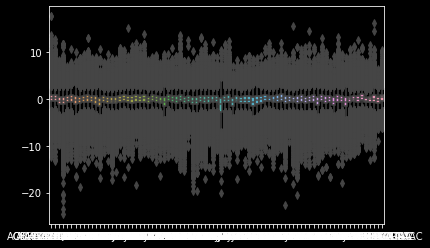

In [98]:
sns.boxplot(data=df_data)

<AxesSubplot:>

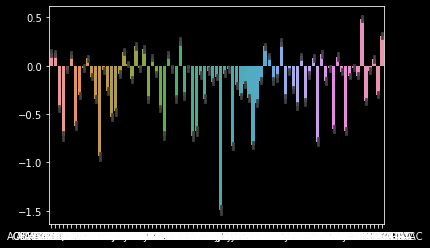

In [99]:
sns.barplot(data=df_data)

<AxesSubplot:>

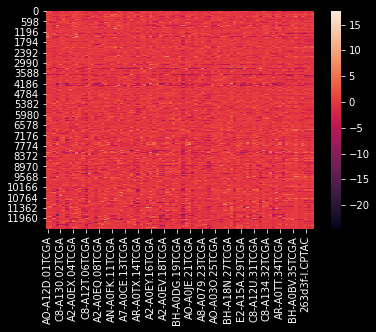

In [100]:
sns.heatmap(df_data)

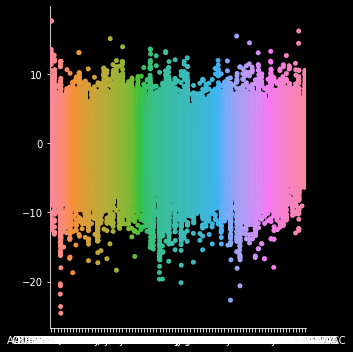

In [101]:
sns.catplot(data=df_data)

In [102]:
df_data.describe()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
count,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,...,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000
mean,0.133079,0.128822,-0.440764,-0.729233,-0.039436,0.115353,-0.618354,-0.305320,-0.021228,0.077247,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.069555,-0.298170,0.310974
std,1.647870,1.501239,1.553514,2.370856,1.324731,1.604811,2.215408,1.515551,1.596979,1.658304,...,1.929944,1.424341,1.502253,1.476405,1.457062,1.277427,1.508402,1.818835,1.217089,1.591358
min,-12.466750,-13.156553,-9.911008,-24.553794,-15.004199,-12.956961,-16.640848,-18.710032,-14.711526,-13.441463,...,-12.497832,-12.152747,-11.874381,-11.128835,-8.772601,-10.427946,-12.967849,-12.609296,-9.058864,-6.328154
25%,-0.561131,-0.494782,-1.175322,-1.203029,-0.631814,-0.614116,-1.177096,-0.917277,-0.645800,-0.614465,...,-1.563440,-0.609986,-0.549382,-0.616170,-0.240679,-0.750798,-0.642855,-0.691374,-0.903764,-0.523581
50%,0.133079,0.128822,-0.440764,-0.359993,-0.031598,0.115353,-0.251303,-0.305320,-0.021228,0.077247,...,-0.638442,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.069555,-0.298170,0.310974
75%,0.791347,0.751966,0.390561,0.409445,0.683413,0.863368,0.618039,0.428832,0.686111,0.741532,...,0.400754,0.483505,0.609178,0.520961,0.940171,0.282294,0.462432,0.828451,0.455946,0.883588
max,17.623036,12.677023,8.289261,11.790434,6.925004,10.602330,10.079191,8.804312,9.548006,13.066445,...,8.839935,10.694780,11.309371,12.638208,11.164262,7.886564,11.521261,16.183559,6.435721,10.497291


In [103]:
df_data.corr()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
AO-A12D.01TCGA,1.000000,0.340271,0.015298,-0.025330,0.011770,0.207323,-0.149197,0.135678,0.064357,0.709330,...,-0.079359,-0.057243,0.029917,-0.113783,-0.050547,-0.099207,-0.095028,-0.193382,-0.183548,-0.163969
C8-A131.01TCGA,0.340271,1.000000,-0.059109,0.028682,-0.000075,0.013644,-0.077434,0.268873,0.102167,0.209744,...,-0.153678,-0.001958,0.150671,-0.032306,0.120248,-0.070295,0.153403,-0.006491,-0.066403,0.031243
AO-A12B.01TCGA,0.015298,-0.059109,1.000000,0.096097,0.025630,-0.051936,0.259750,-0.026490,-0.030921,-0.025646,...,0.738333,0.011090,-0.062025,0.054485,-0.158172,0.124953,-0.173101,0.060846,0.188941,0.011610
BH-A18Q.02TCGA,-0.025330,0.028682,0.096097,1.000000,0.111611,-0.147415,0.393206,0.163881,0.104233,0.019295,...,0.158888,0.117314,0.193664,0.078766,0.082425,0.064896,0.148002,0.234013,0.217028,0.185135
C8-A130.02TCGA,0.011770,-0.000075,0.025630,0.111611,1.000000,0.027625,0.101308,0.121297,0.185213,0.033535,...,0.050295,0.123878,0.183138,0.121369,0.049904,0.079885,0.062137,-0.013642,-0.094543,-0.071969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH-A0C7.36TCGA,-0.099207,-0.070295,0.124953,0.064896,0.079885,-0.028000,0.188549,-0.023698,0.081859,-0.090397,...,0.146332,0.231318,0.168942,0.164707,0.229652,1.000000,0.212996,0.197618,0.257259,0.180688
A2-A0SX.36TCGA,-0.095028,0.153403,-0.173101,0.148002,0.062137,-0.074334,0.048128,0.056076,0.169930,-0.110041,...,-0.162336,0.391879,0.373427,0.347882,0.682017,0.212996,1.000000,0.290797,0.095174,0.321001
263d3f-I.CPTAC,-0.193382,-0.006491,0.060846,0.234013,-0.013642,-0.173202,0.341495,-0.024699,0.172607,-0.185838,...,0.085042,0.243443,0.202177,0.289535,0.369793,0.197618,0.290797,1.000000,0.665259,0.840931
blcdb9-I.CPTAC,-0.183548,-0.066403,0.188941,0.217028,-0.094543,-0.194218,0.387890,-0.031492,-0.011112,-0.172463,...,0.218285,0.166226,0.094091,0.140547,0.157210,0.257259,0.095174,0.665259,1.000000,0.714829


In [104]:
data = np.array(data)

In [153]:
KM = KMeans (2)
KM.fit(df_data)
y_pred=KM.predict(df_data)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

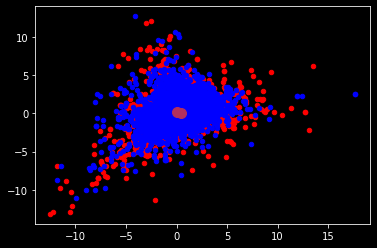

In [154]:
plt.scatter(data[y_pred == 0, 0], data[y_pred == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')

plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:, 1], s = 100, c = '#b3305e', label = 'Centroids')
plt.show()

In [155]:
centers = KM.cluster_centers_
labels  = KM.labels_
inertial= KM.inertia_
iteration=KM.n_iter_

In [156]:
centers

array([[ 3.96234983e-01, -2.92162608e-03, -1.21787412e+00,
        -3.54372015e+00, -5.24603683e-01,  5.95718451e-01,
        -3.48941631e+00, -9.80623930e-01, -8.26464399e-01,
         1.92223117e-01,  1.30166333e-01, -2.23141604e+00,
        -2.99617765e+00, -2.03274414e-01, -8.24614476e-01,
        -2.61921737e+00, -1.45995101e+00, -7.58476463e-01,
        -3.40215096e-02, -1.79372126e-01, -8.36963335e-01,
        -9.63704054e-01, -4.91784675e-02, -8.38897178e-01,
        -1.01029735e+00, -1.04596197e-01,  1.07887570e-02,
        -1.24926564e+00, -2.84714230e+00, -8.32100776e-03,
         4.73021671e-01, -1.83649490e+00,  2.83752517e-01,
        -6.11266085e-01, -1.52889702e-01, -3.54048532e+00,
        -3.52770113e+00, -9.11337537e-01, -2.51229790e+00,
        -7.92377828e-01, -8.17191868e-01, -5.07367495e-01,
        -4.50849978e+00, -8.27446377e-01, -1.29158975e+00,
        -2.74032833e+00, -9.92855534e-01, -6.12326432e-01,
        -1.07000976e+00, -2.06664333e+00, -3.14508663e+0

In [157]:
labels

array([1, 1, 1, ..., 1, 1, 0])

In [158]:
inertial

2618033.962460953

In [159]:
iteration

21

In [160]:
silhouette_Score = silhouette_score(data , labels)
print('Silutescore Score for KMean :: ',silhouette_Score)

Silutescore Score for KMean ::  0.3138364456705151
